In [2]:
import os
import sys
import json
import torch
import networkx as nx
from pathlib import Path
from pprint import pprint
from dataclasses import asdict

from matplotlib import pyplot as plt

%matplotlib inline 

In [3]:
from graph_bridges.models.generative_models.ctdd import CTDD
from graph_bridges.configs.graphs.config_ctdd import CTDDConfig
from graph_bridges.utils.plots.graph_plots import plot_graphs_list2
from graph_bridges.data.graph_dataloaders_config import EgoConfig, CommunityConfig, GraphSpinsDataLoaderConfig, TargetConfig
from graph_bridges.models.backward_rates.backward_rate_config import BackRateMLPConfig, GaussianTargetRateImageX0PredEMAConfig

In [5]:
from graph_bridges.models.metrics.ctdd_metrics import graph_metrics_for_ctdd,marginal_histograms_for_ctdd
from graph_bridges.utils.plots.histograms_plots import plot_histograms

In [6]:
device = torch.device("cpu")
config = CTDDConfig(experiment_indentifier="test_1")
config.data = CommunityConfig(as_image=False,batch_size=32,full_adjacency=False)
config.model = GaussianTargetRateImageX0PredEMAConfig(time_embed_dim=32,fix_logistic=False)
config.initialize_new_experiment()

In [7]:
ctdd = CTDD()
ctdd.create_new_from_config(config,device)

Scheduler


In [12]:
generated_graphs = ctdd.generate_graphs(number_of_graphs=26)

20it [00:00, 47.58it/s]


In [18]:
config.experiment_files.__dict__.keys()

dict_keys(['experiment_indentifier', 'experiment_name', 'experiment_type', 'results_dir', 'delete', 'current_git_commit', 'experiment_dir', 'experiment_type_dir', 'save_location', 'tensorboard_path', 'config_path', 'metrics_file', 'data_stats', 'best_model_path_checkpoint', 'best_model_path', 'plot_path', 'graph_plot_path'])

In [34]:
histograms_plot_path_ = config.experiment_files.plot_path.format("histograms_0")
graph_plot_path_ = config.experiment_files.graph_plot_path.format("generative_0")

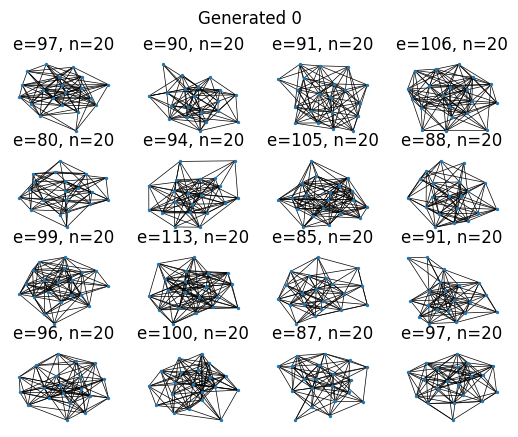

In [24]:
plot_graphs_list2(generated_graphs,title="Generated 0",save_dir=graph_plot_path_)

In [15]:
graph_metrics = graph_metrics_for_ctdd(ctdd,config)
marginal_histograms = marginal_histograms_for_ctdd(ctdd,config,device)

20it [00:00, 54.97it/s]


20 20
Time computing degree mmd:  0:00:04.312591
{'degree': 1.0585666165392513}
Time computing clustering mmd:  0:00:05.040574
{'degree': 1.0585666165392513, 'cluster': 0.8993260998183313}
-------------------------
[ 9.515  42.595  21.2975 21.5475 91.2    91.2    43.32   14.44   44.81
 45.825  91.65   45.825  45.71   45.71   15.18  ]
...
[3.455  5.945  2.9725 4.0575 5.63   5.63   2.16   0.72   2.21   2.4225
 4.845  2.4225 3.815  3.815  1.63  ]
-------------------------
{'degree': 1.0585666165392513, 'cluster': 0.8993260998183313, 'orbit': 1.365765797662872}


20it [00:00, 39.29it/s]
20it [00:00, 41.61it/s]
20it [00:00, 40.34it/s]
20it [00:00, 40.92it/s]
20it [00:00, 36.97it/s]


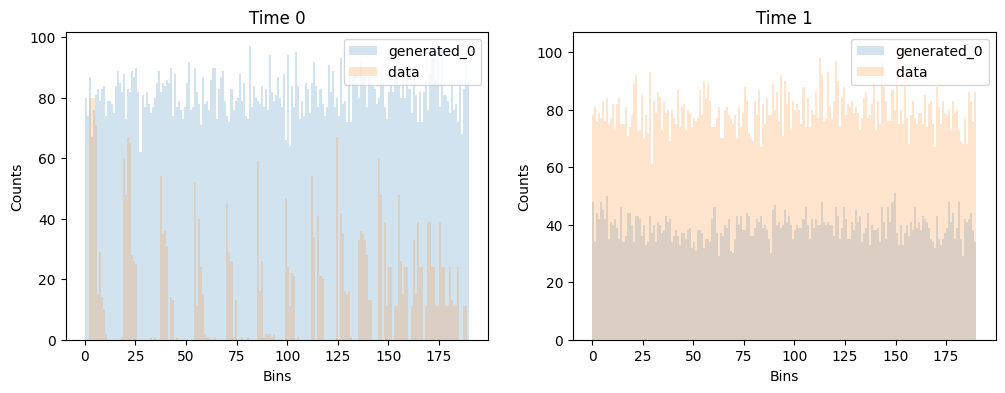

In [35]:
plot_histograms(marginal_histograms,plots_path=histograms_plot_path_)

In [44]:
graph_metrics_path_ =  config.experiment_files.metrics_file.format("graph_0")
with open(graph_metrics_path_,"w") as f:
    json.dump(graph_metrics,f)

In [42]:
json.dump?

In [36]:
graph_metrics

{'degree': 1.0585666165392513,
 'cluster': 0.8993260998183313,
 'orbit': 1.365765797662872}